# Exploratory data analysis | Mobile Price Classification

Data source: [Kaggle](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from minepy import MINE
import sys
sys.path.append("..")

from src.data import MP_Dataset

sns.set_style("darkgrid")

In [13]:
color = ["royalblue", "orange"]

MPD = MP_Dataset("..")

dict_data = MPD.get_data()
dict_data.keys()

dict_keys(['description', 'train', 'train_x', 'train_fe', 'train_fe_x', 'train_y', 'test', 'test_x', 'test_fe', 'test_fe_x', 'test_y'])

| Dictionary key | Description |
| -------------- | ----------- |
| description | Describes the dataset columns |
| train | Training dataset |
| train_x | Training dataset without target column |
| train_fe | Training dataset with extended features |
| train_fe_x | Training dataset with extended features without target column |
| train_y | Training dataset only target column |
| test | Test dataset |
| test_x | Test dataset without target column |
| test_fe | Test dataset with extended features |
| test_fe_x | est dataset with extended features without target column |
| test_y | Test dataset only target column |

## First insight

In [14]:
df = dict_data["train_fe"]
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,core_ram_ratio,processor_speed,core_weight_ratio,mem_weight_ratio,battery_efficiency,battery_screen_ratio,battery_weight_ratio,connectivity_score,volume,density
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0.000785,4.4,0.010638,0.037234,44.315789,13.365079,4.478723,1,37.8,4.973545
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0.001140,1.5,0.022059,0.389706,145.857143,20.019608,7.507353,3,35.7,3.809524
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0.001921,2.5,0.034483,0.282759,62.555556,25.590909,3.882759,3,19.8,7.323232
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0.002167,15.0,0.045802,0.076336,55.909091,4.804688,4.694656,2,102.4,1.279297
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0.001417,2.4,0.014184,0.312057,121.400000,113.812500,12.914894,3,9.6,14.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,0.008982,3.0,0.056604,0.018868,41.789474,15.269231,7.490566,3,41.6,2.548077
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,0.001969,10.4,0.021390,0.208556,122.812500,17.863636,10.508021,3,22.0,8.500000
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,0.002617,7.2,0.074074,0.333333,382.200000,212.333333,17.694444,2,6.3,17.142857
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,0.005754,4.5,0.034483,0.317241,79.578947,8.400000,10.427586,3,18.0,8.055556


In [15]:
dict_data["description"]

,column_name,description
0,battery_power,Total energy a battery can store in one time m...
1,blue,Has bluetooth or not
2,clock_speed,speed at which microprocessor executes instruc...
3,dual_sim,Has dual sim support or not
4,fc,Front Camera mega pixels
5,four_g,Has 4G or not
6,int_memory,Internal Memory in Gigabytes
7,m_dep,Mobile Depth in cm
8,mobile_wt,Weight of mobile phone
9,n_cores,Number of cores of processor


## Labels

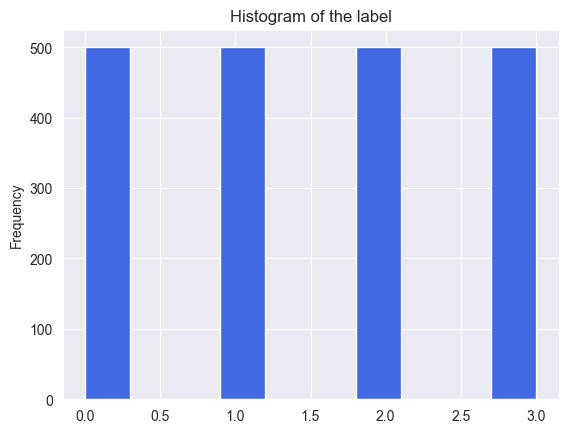

In [16]:
# Histogram of the target column price_range
df["price_range"].plot(kind="hist", title="Histogram of the label", color=color[0])
plt.show()

The four labels are almost equally distributed.

## Features

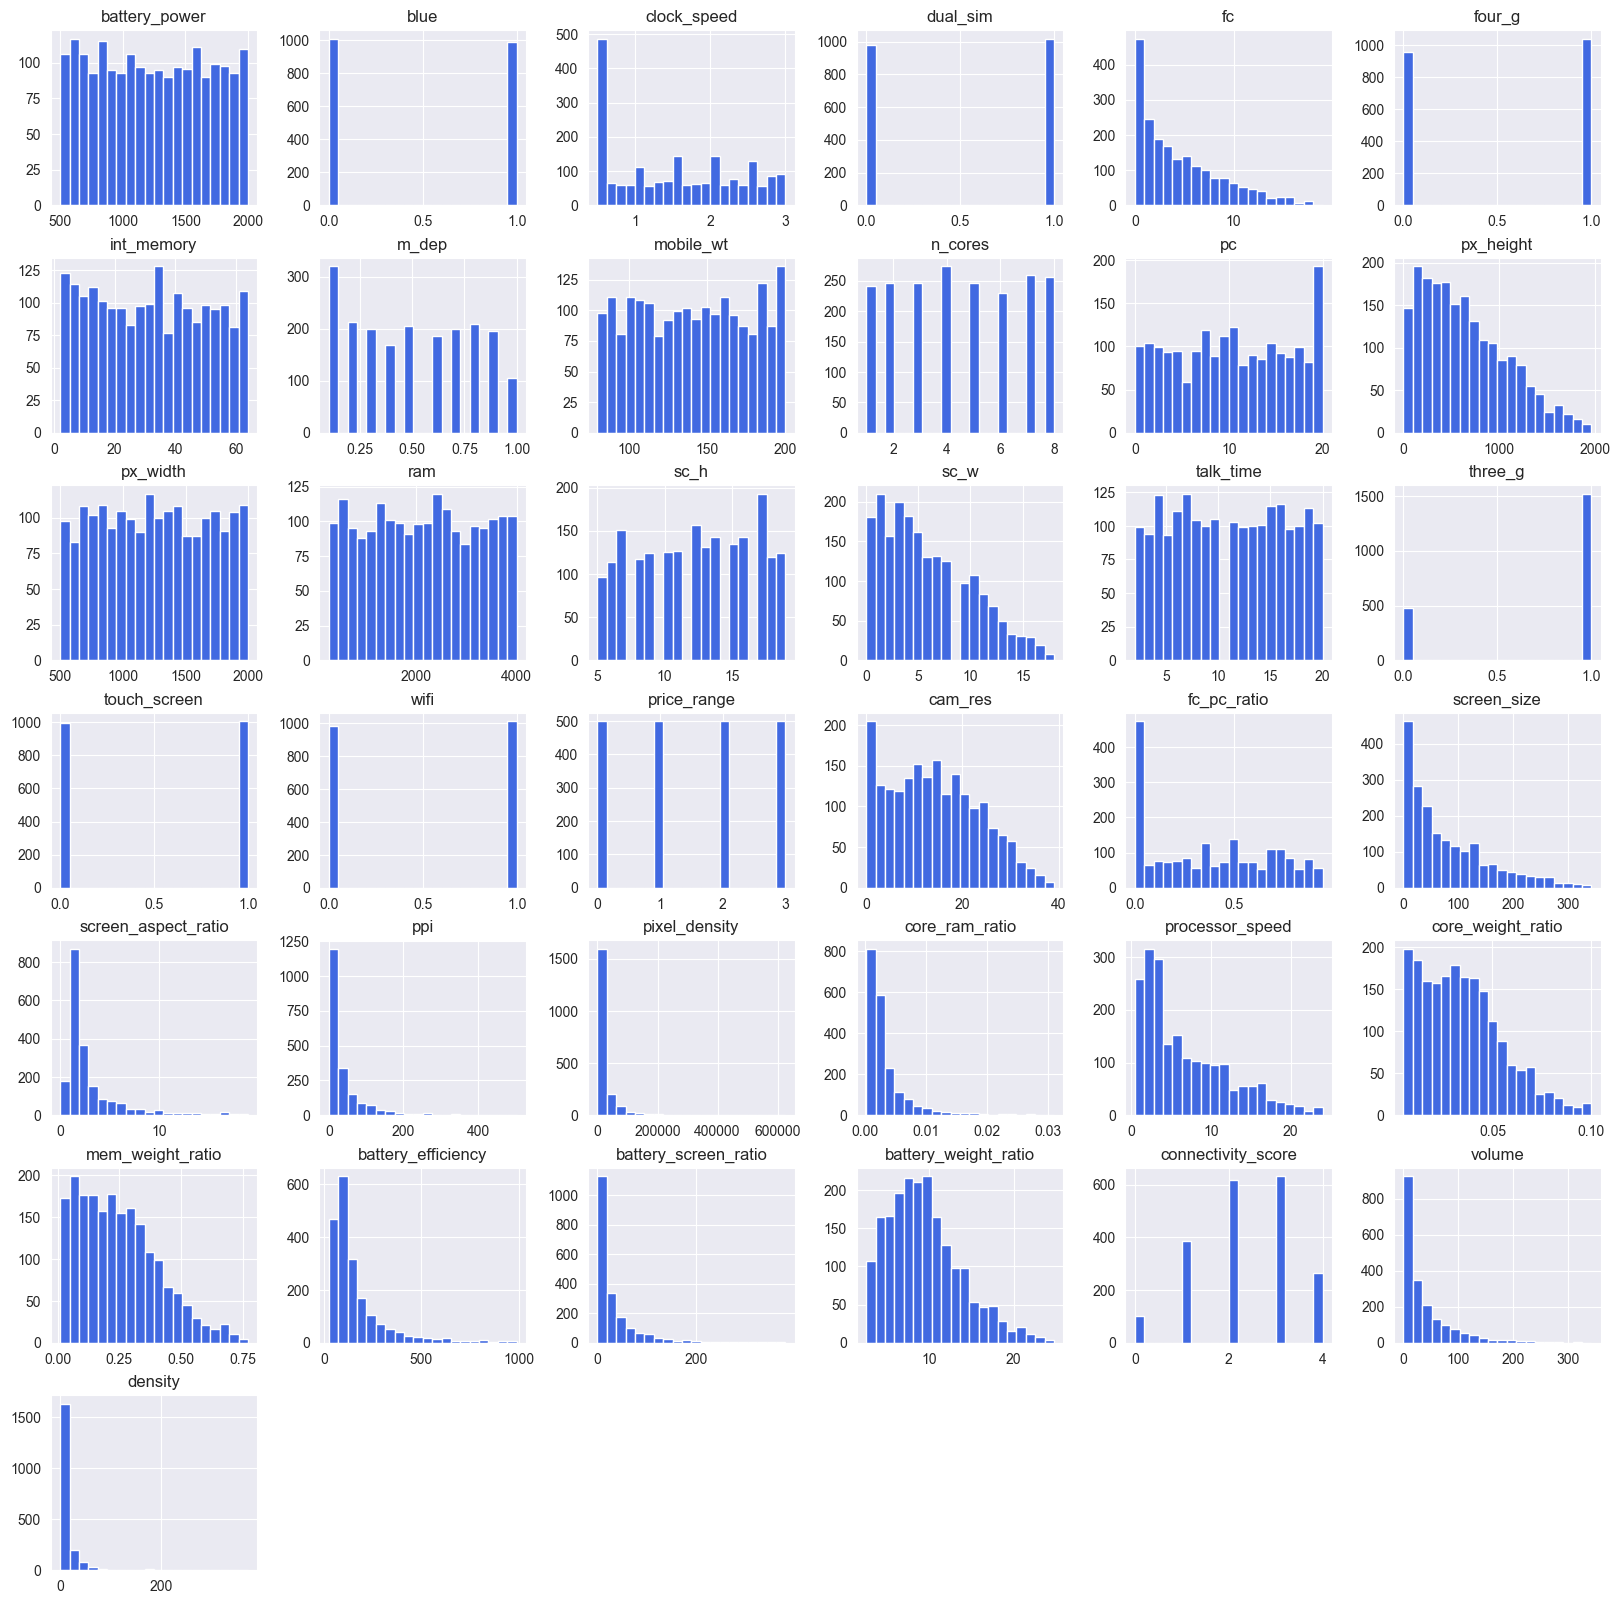

In [17]:
# Histogram of each feature in a subplot
df.hist(bins=20, figsize=(20, 20), color=color[0])
plt.show()

sc_w contains 0 values! This makes no sense as it is the screen width, which is greater than 0.

## Pearson correlation

In [ ]:
# Correlation between all features
correlation_matrix = df.corr().round(2)
correlation_matrix = np.tril(correlation_matrix)    # Lower triangle
correlation_matrix[np.triu_indices_from(correlation_matrix, k=1)] = None
correlation_matrix = pd.DataFrame(correlation_matrix, columns=df.columns, index=df.columns)

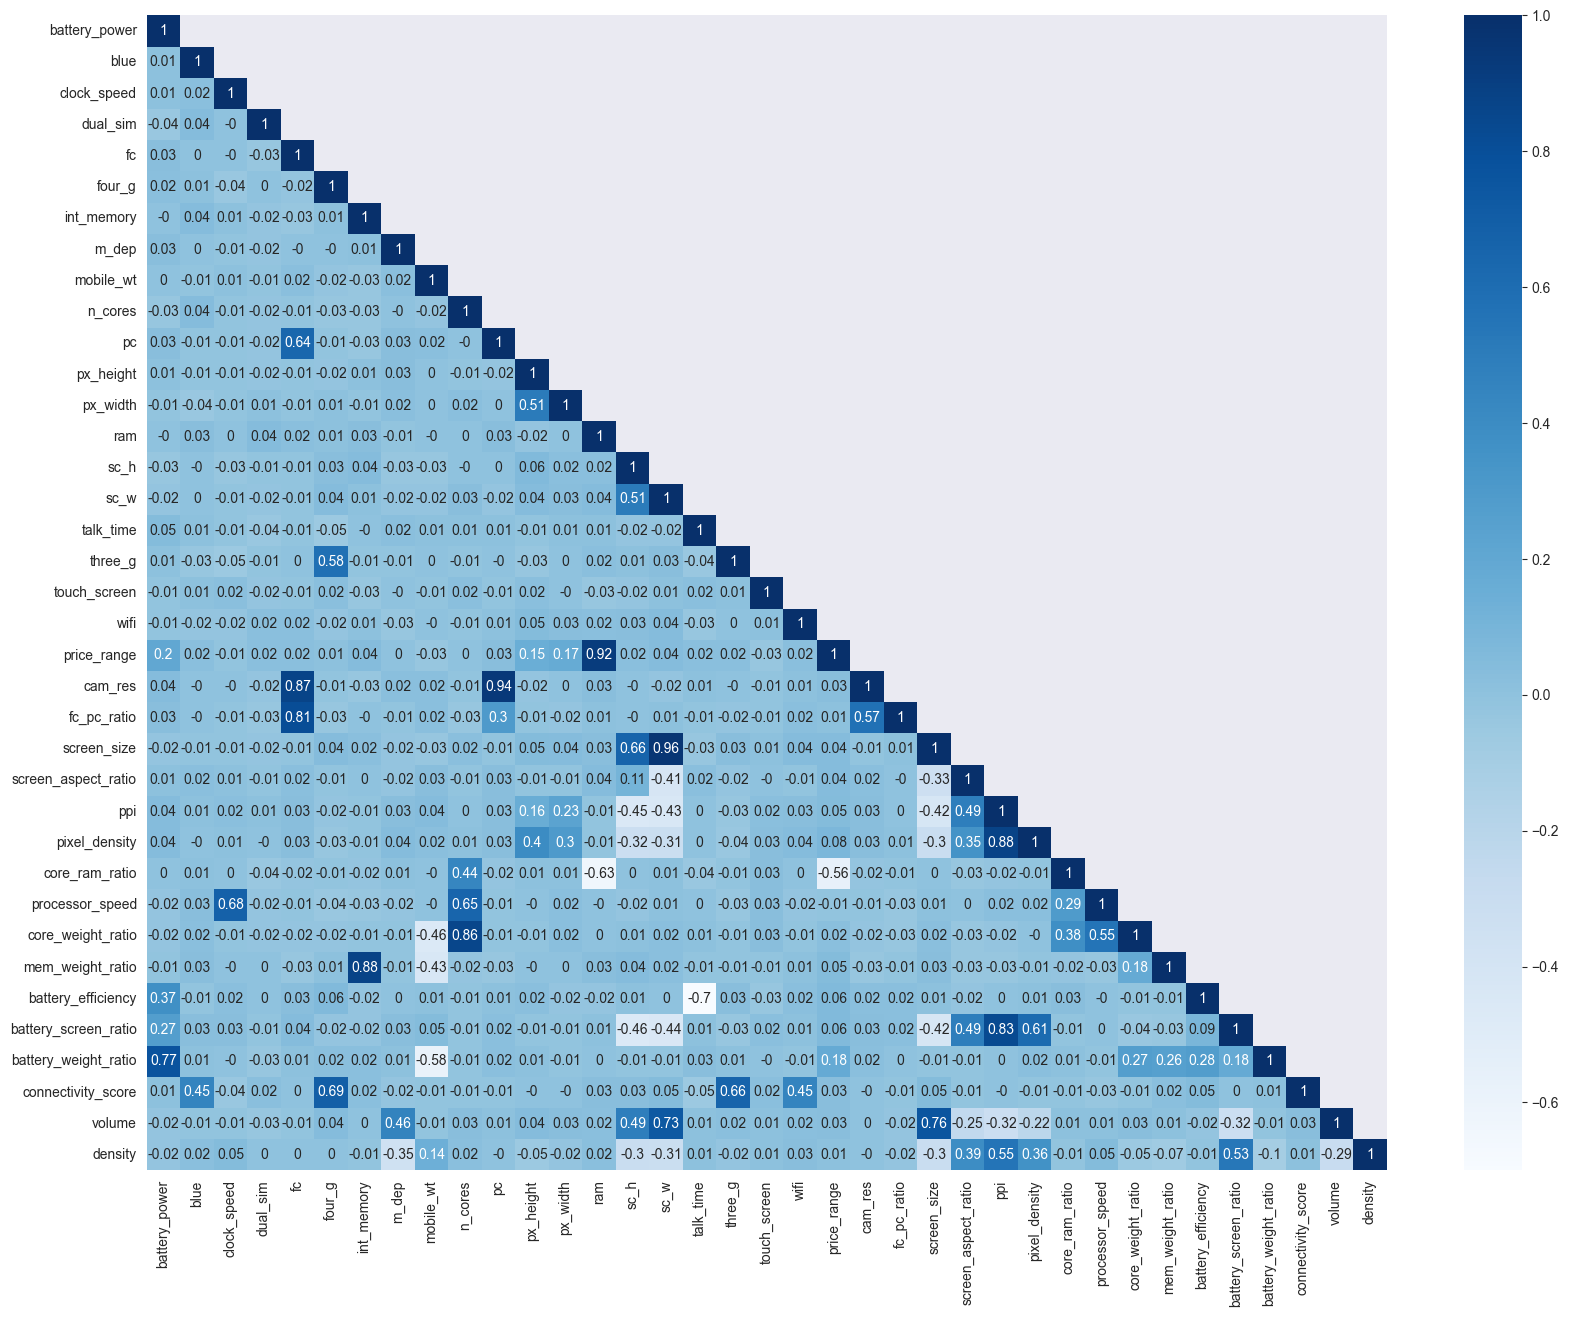

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.show()

Relevant features for price_range (>= 0.15):
- battery_power
- px_height
- px_width
- ram
- core_ram_ratio
- battery_weight_ratio

## Predictive power score (PPS)

In [14]:
matrix = pps.matrix(df)[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")
matrix = np.tril(matrix.round(2))    # Lower triangle
matrix[np.triu_indices_from(matrix, k=1)] = None
matrix = pd.DataFrame(matrix, columns=df.columns, index=df.columns)

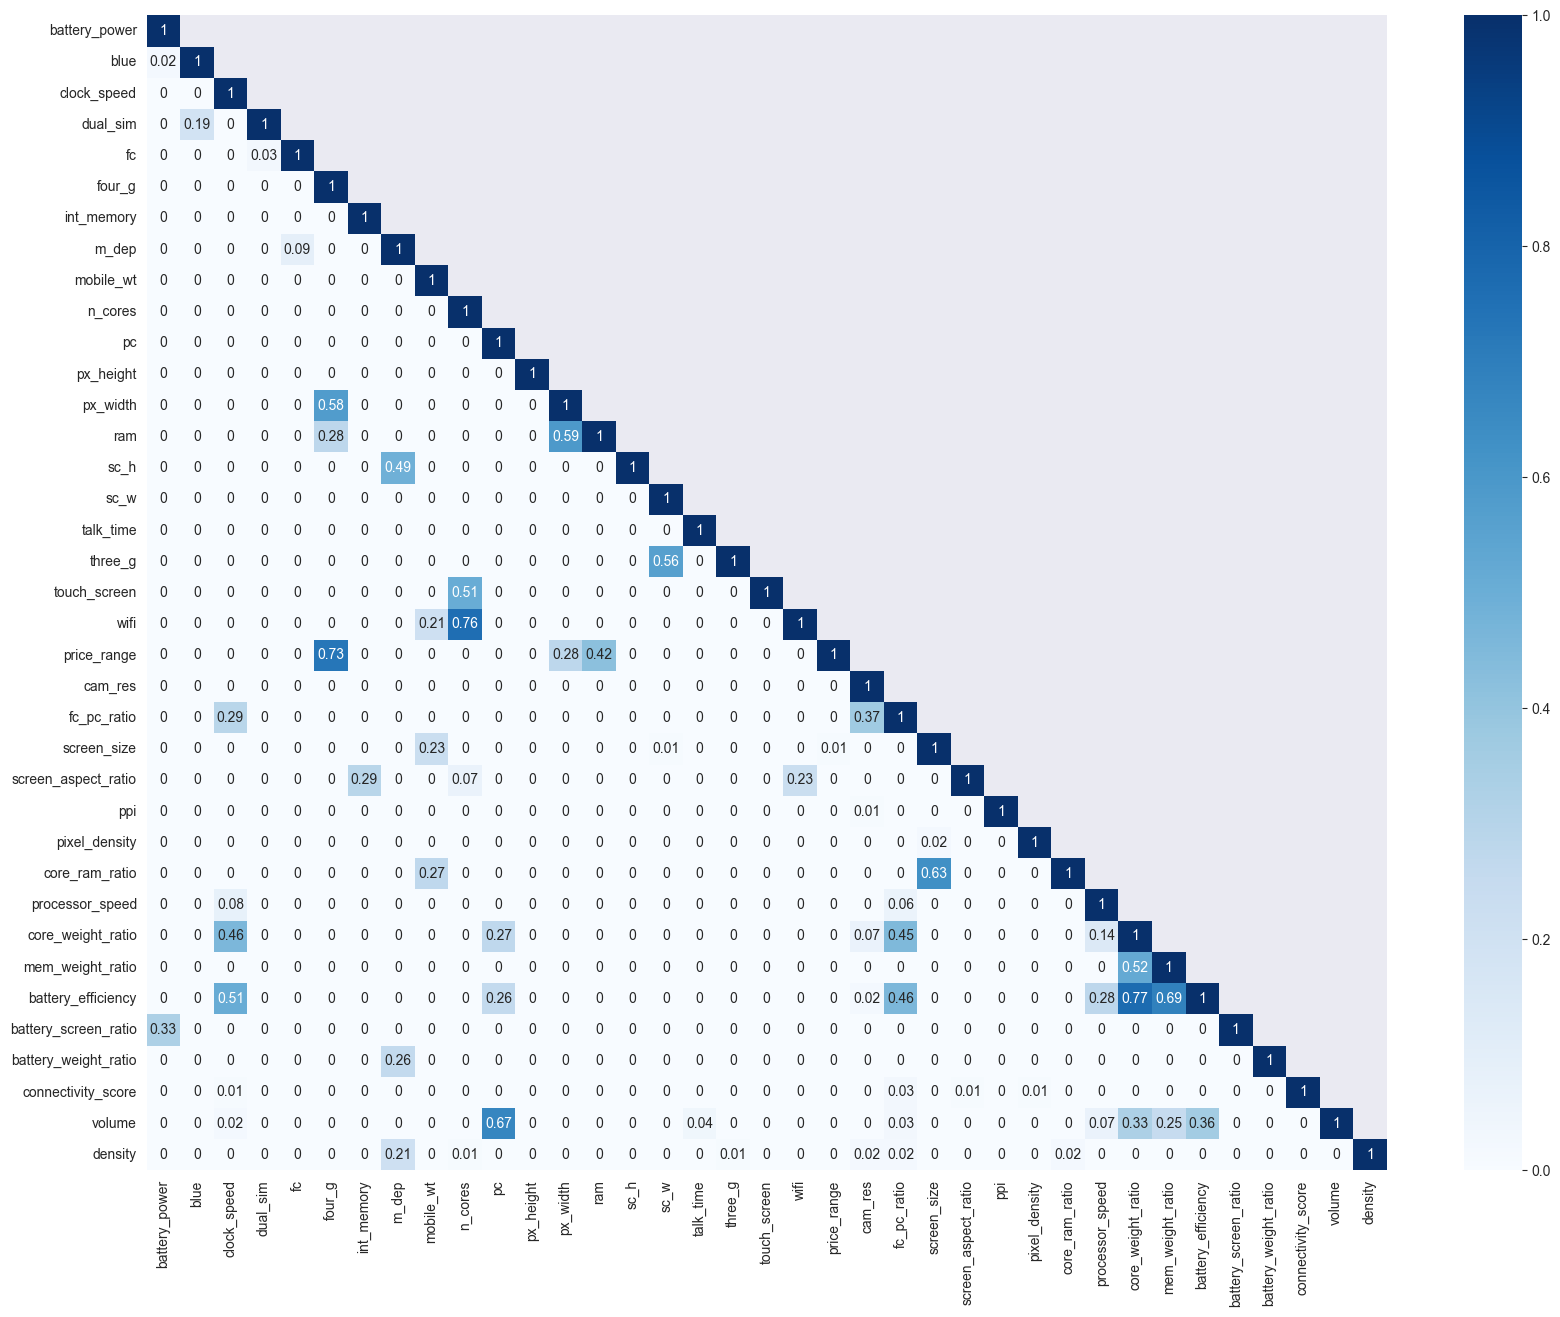

In [20]:
plt.figure(figsize=(20, 15))
sns.heatmap(matrix, annot=True, cmap="Blues")
plt.show()

Relevant features for price_range (>= 0.2):
- four_g
- px_width
- ram

## Maximal Information Coefficient (MIC)

In [27]:
# create MINE-Instance 
mine = MINE(alpha=0.6, c=15, est="mic_approx")

# Calculating the MIC values for the upper triangular matrix
mic_matrix = np.zeros((df.shape[1], df.shape[1]))

for i in range(df.shape[1]):
    for j in range(i, df.shape[1]):
        x = df.iloc[:, i]
        y = df.iloc[:, j]
        
        mine.compute_score(x, y)
        mic_matrix[i, j] = mine.mic()

# Mirroring the values in the lower triangular matrix
mic_matrix = mic_matrix + mic_matrix.T - np.diag(mic_matrix.diagonal())

mic_matrix = np.tril(mic_matrix.round(2))    # Lower triangle
mic_matrix[np.triu_indices_from(mic_matrix, k=1)] = None

# Create DataFrame from the MIC matrix
mic_matrix = pd.DataFrame(mic_matrix, columns=df.columns, index=df.columns)

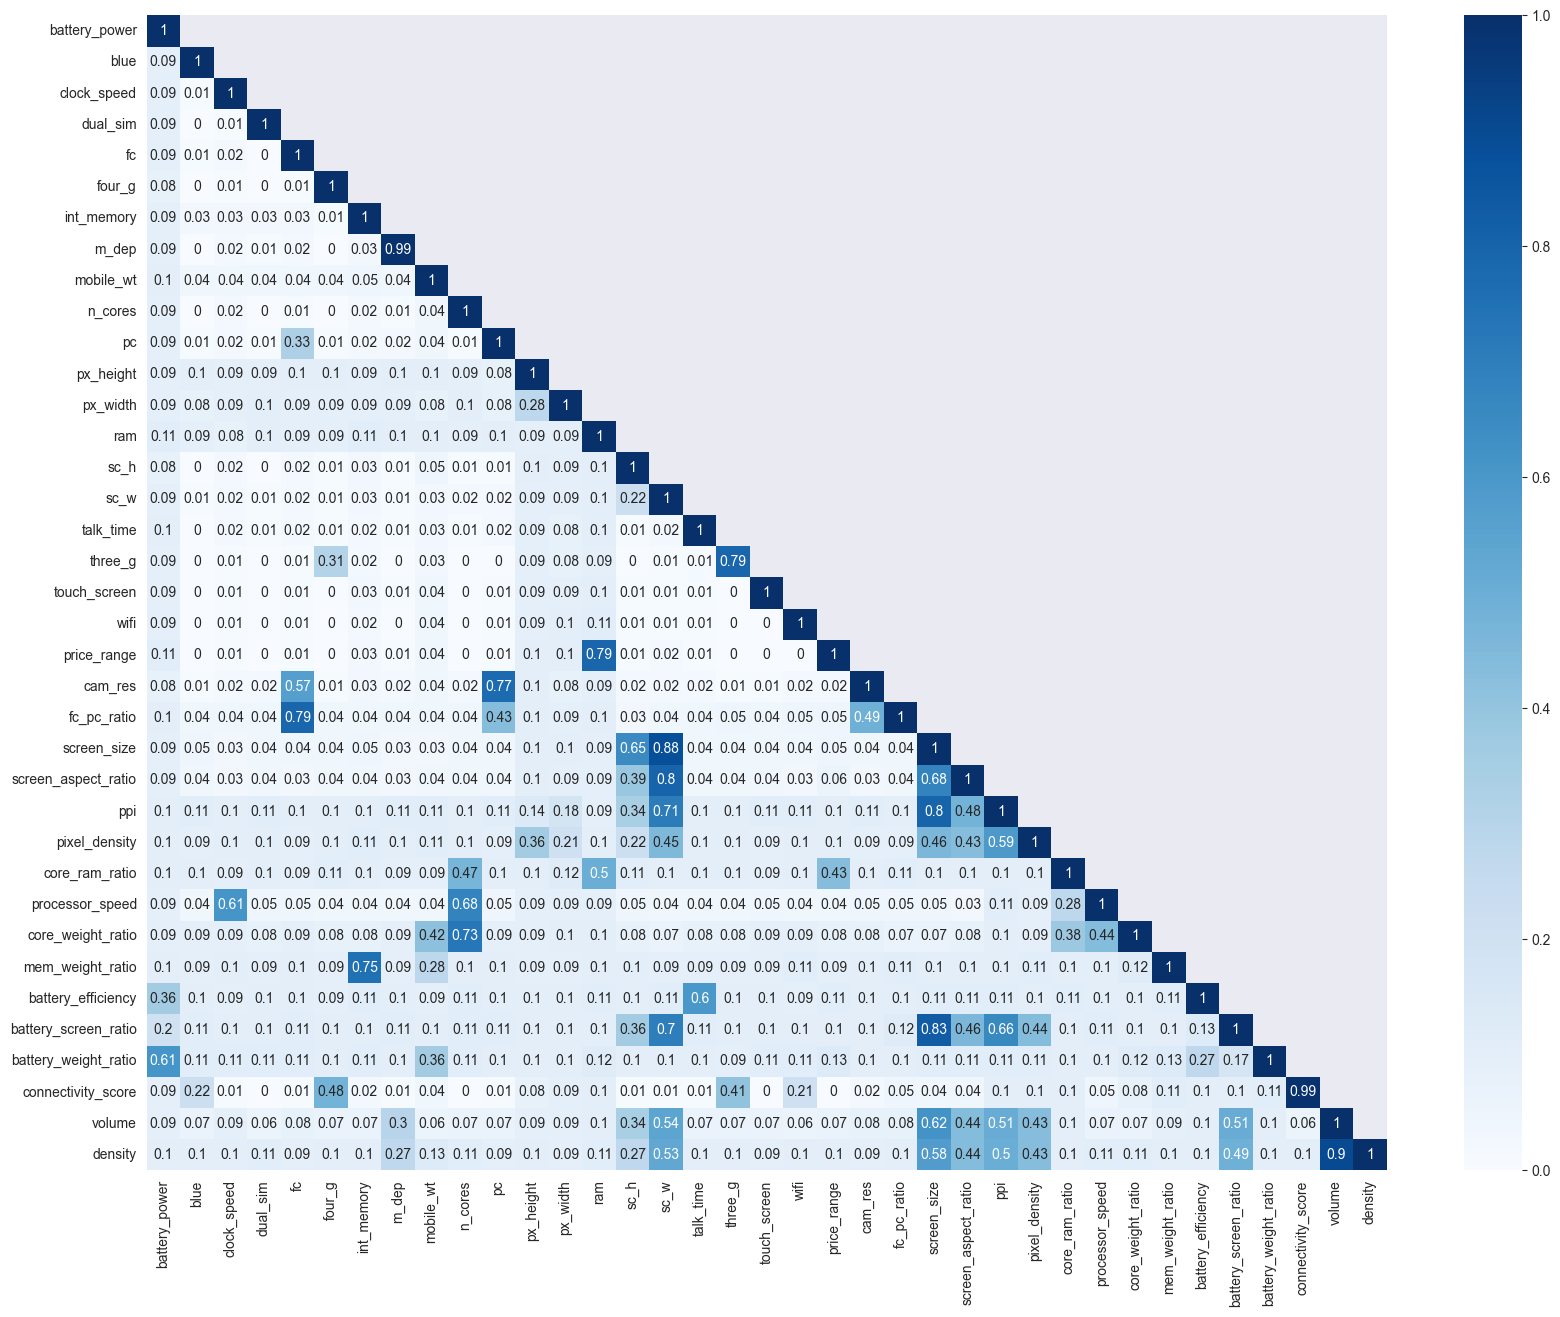

In [28]:
plt.figure(figsize=(20, 15))
sns.heatmap(mic_matrix, annot=True, cmap="Blues")
plt.show()

Relevant features for price_range (>= 0.15):
- ram
- core_ram_ratio

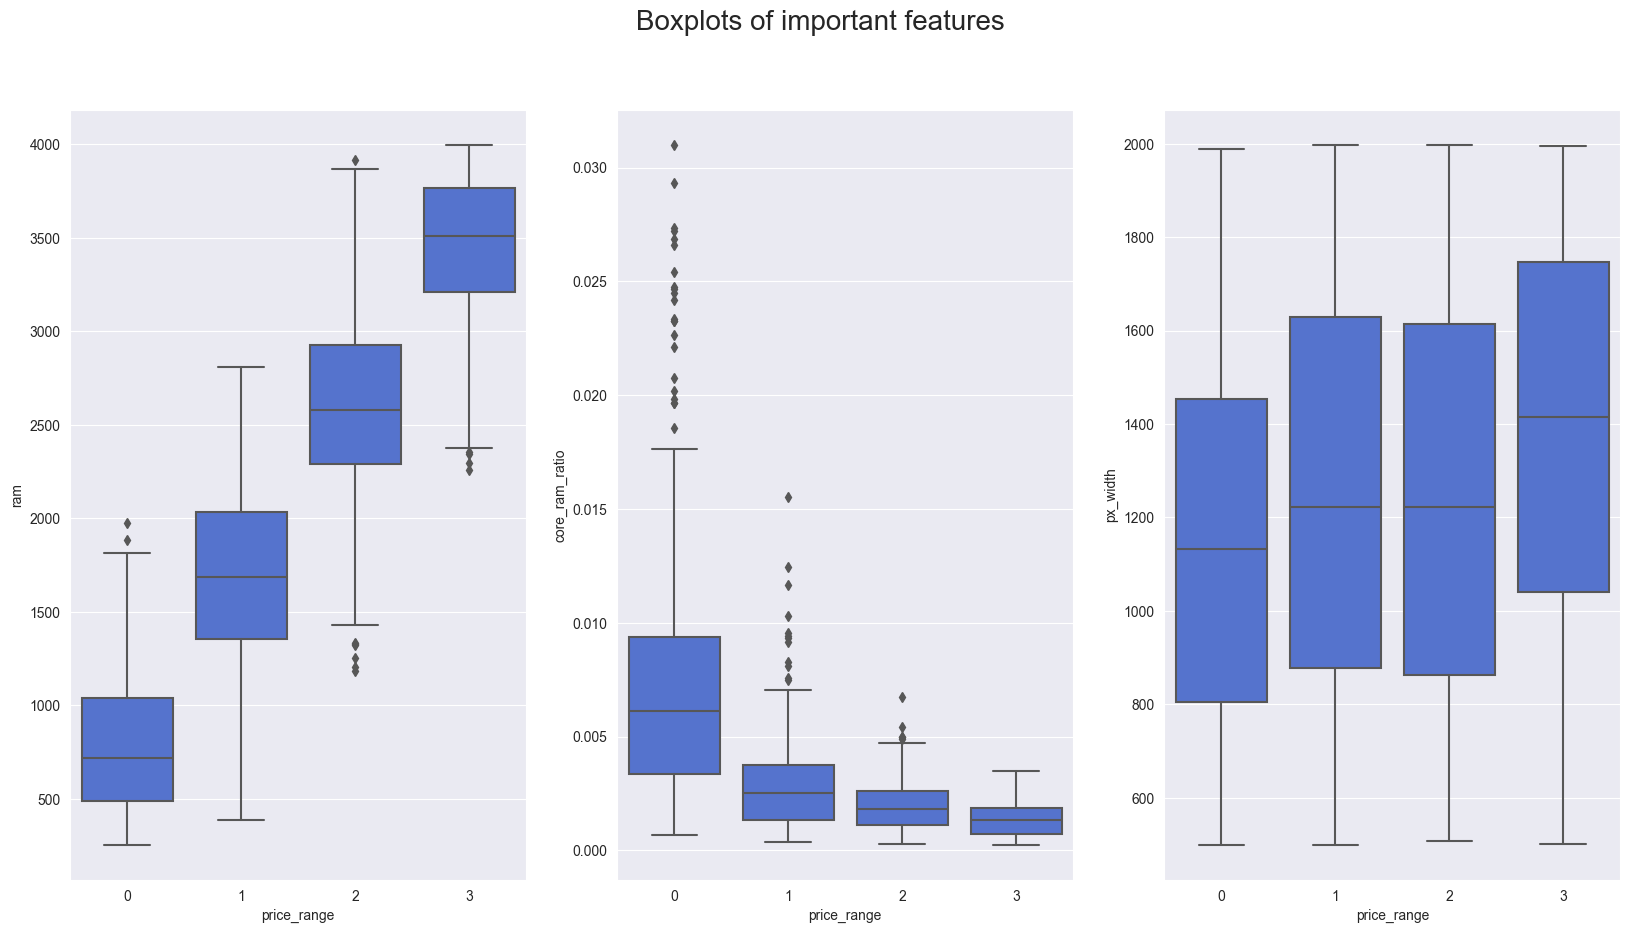

In [33]:
# Box plot of three important features
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.boxplot(x="price_range", y="ram", data=df, color=color[0], ax=ax[0])
sns.boxplot(x="price_range", y="px_width", data=df, color=color[0], ax=ax[2])
sns.boxplot(x="price_range", y="core_ram_ratio", data=df, color=color[0], ax=ax[1])
fig.suptitle("Boxplots of important features", fontsize=20)
plt.show()